In [1]:
from langchain_ollama import ChatOllama
from langchain_huggingface import HuggingFaceEmbeddings
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from ragas.testset import TestsetGenerator
from ragas.metrics import LLMContextRecall, ResponseRelevancy, Faithfulness 
from ragas.run_config import RunConfig
from ragas import evaluate
from langchain_community.document_loaders import PyPDFDirectoryLoader, PyPDFLoader
from test_app_multy_query import graph as MQgraph
from test_app import graph as BaseGraph, invoke_coll, graph_builder
from test_app_parent_child import graph as PCgraph
import rag
from ragas import EvaluationDataset



conexión


c:\Users\Usuario\Desktop\Universidad_23_24\TFG\EL_NUEVO\desarrollo\env\Lib\site-packages\gradio\components\chatbot.py:255: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


conexión


c:\Users\Usuario\Desktop\Universidad_23_24\TFG\EL_NUEVO\desarrollo\env\Lib\site-packages\gradio\components\chatbot.py:255: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


conexión


c:\Users\Usuario\Desktop\Universidad_23_24\TFG\EL_NUEVO\desarrollo\env\Lib\site-packages\gradio\components\chatbot.py:255: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


In [2]:
# embedding models: all-MiniLM-L6-v2 | all-mpnet-base-v2 | multi-qa-mpnet-base-dot-v1
# distancias: l2 | ip | cosine
# splitter_names = ["Recursive", "NLTK", "Spacy", "STtoken"]
# llms = ["llama3.1:8b-instruct-q4_K_M", "llama3.2:latest", "mistral-nemo:latest"]


In [3]:
modelo_base = {
    "coll_name": "all-MiniLM-L6-v2",
    "distance": "l2",
    "model": "all-MiniLM-L6-v2",
    "llm_model": "llama3.1:8b-instruct-q4_K_M"
}

ip_distance         = { **modelo_base, "coll_name": "ip-coll", "distance": "ip"}
cosine_distance     = { **modelo_base, "coll_name": "cosine", "distance": "cosine"}
mpnet_base_model    = { **modelo_base, "coll_name": "all-mpnet-base-v2", "model": "all-mpnet-base-v2"}
multi_qa_model      = { **modelo_base, "coll_name": "multi-qa-mpnet-base-dot-v1", "model": "multi-qa-mpnet-base-dot-v1"}
NLTK_splitter       = { **modelo_base, "coll_name": "NLTK" }
Spacy_splitter      = { **modelo_base, "coll_name": "Spacy" }
STtoken_splitter    = { **modelo_base, "coll_name": "STtoken" }
llama3b_llm         = { **modelo_base, "llm_model": "llama3.2:latest"}
mistral_llm         = { **modelo_base, "llm_model": "mistral-nemo:latest"}

arr_parametros = [modelo_base, ip_distance, cosine_distance, mpnet_base_model, multi_qa_model, NLTK_splitter, Spacy_splitter, STtoken_splitter, llama3b_llm, mistral_llm]


In [4]:
# for parametro in arr_parametros:
#     invoke_coll(**parametro)

In [5]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class State(TypedDict): 
    question: str
    queries: List[str]
    context: List[Document]     
    answer: str
    history: List[List[str]] 
    complex: bool


In [6]:
from typing import Literal

def fork1(state: State) -> Literal["gen_query", "retrieve"]:
    if state['complex']:
        return "gen_query"
    else:
        return "retrieve"

def fork2(state: State) -> Literal["rerank", "generate"]:
    if state['complex'] == True:
        return "rerank"
    else:
        return "generate"

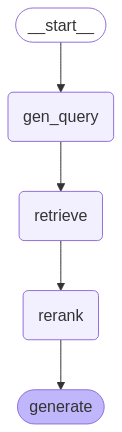

conexión


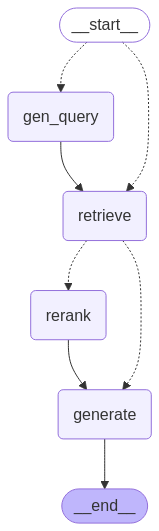

Documentos encontrados: 
[Document(metadata={'producer': 'Prince 6.0 (www.princexml.com)', 'creator': 'HTML Tidy for FreeBSD (vers 25 March 2009), see www.w3.org', 'creationdate': '', 'subject': 'Fiction, Horror, Short Stories', 'author': 'Kafka, Franz', 'title': 'The Metamorphosis', 'source': 'C:\\Users\\Usuario\\Desktop\\Universidad_23_24\\TFG\\EL_NUEVO\\docs\\Franz_Kafka_The_Metamorphosis.pdf', 'total_pages': 54}, page_content='versation. But it was the very uncertainty which distressed the others\nand excused their behaviour.\n"Mr. Samsa," the manager was now shouting, his voice raised, "what\'s\nthe matter? You are barricading yourself in your room, answer with only\na yes and a no, are making serious and unnecessary troubles for your\n9\n\x0cparents, and neglecting (I mention this only incidentally) your commer-\ncial duties in a truly unheard of manner. I am speaking here in the name\nof your parents and your employer, and I am requesting you in all seri-\nousness for an immedia

{'question': 'hola',
 'context': [Document(metadata={'producer': 'Prince 6.0 (www.princexml.com)', 'creator': 'HTML Tidy for FreeBSD (vers 25 March 2009), see www.w3.org', 'creationdate': '', 'subject': 'Fiction, Horror, Short Stories', 'author': 'Kafka, Franz', 'title': 'The Metamorphosis', 'source': 'C:\\Users\\Usuario\\Desktop\\Universidad_23_24\\TFG\\EL_NUEVO\\docs\\Franz_Kafka_The_Metamorphosis.pdf', 'total_pages': 54}, page_content='versation. But it was the very uncertainty which distressed the others\nand excused their behaviour.\n"Mr. Samsa," the manager was now shouting, his voice raised, "what\'s\nthe matter? You are barricading yourself in your room, answer with only\na yes and a no, are making serious and unnecessary troubles for your\n9\n\x0cparents, and neglecting (I mention this only incidentally) your commer-\ncial duties in a truly unheard of manner. I am speaking here in the name\nof your parents and your employer, and I am requesting you in all seri-\nousness for an

In [7]:
from IPython.display import Image, display

display(Image(MQgraph.get_graph().draw_mermaid_png()))

inst = rag.rag()
inst.graph_builder = rag.StateGraph(State)
for node in [inst.gen_query ,inst.retrieve, inst.rerank, inst.generate]:
    inst.graph_builder.add_node(node)

inst.graph_builder.add_conditional_edges(rag.START, fork1)
inst.graph_builder.add_edge("gen_query", "retrieve")
inst.graph_builder.add_conditional_edges("retrieve", fork2)
inst.graph_builder.add_edge("rerank", "generate")
inst.graph_builder.set_finish_point("generate")
algo = inst.graph_builder.compile()
display(Image(algo.get_graph().draw_mermaid_png()))

algo.invoke({"question": "hola", "complex": False})

In [11]:
BaseGraph.invoke({"question": "Hola"})      

Documentos encontrados: 
[Document(metadata={'author': 'Kafka, Franz', 'creationdate': '', 'creator': 'HTML Tidy for FreeBSD (vers 25 March 2009), see www.w3.org', 'producer': 'Prince 6.0 (www.princexml.com)', 'source': 'C:\\Users\\Usuario\\Desktop\\Universidad_23_24\\TFG\\EL_NUEVO\\docs\\Franz_Kafka_The_Metamorphosis.pdf', 'subject': 'Fiction, Horror, Short Stories', 'title': 'The Metamorphosis', 'total_pages': 54}, page_content='man, smiling so happily she couldn\'t go on speaking right away, "about\nhow that rubbish from the next room should be thrown out, you mustn\'t\nworry about it. It\'s all taken care of." Mrs. Samsa and Grete bent down to\ntheir letters, as though they wanted to go on writing. Mr. Samsa, who\nnoticed that the cleaning woman wanted to start describing everything\nin detail, decisively prevented her with an outstretched hand. But since\nshe was not allowed to explain, she remembered the great hurry she was\nin, and called out, clearly insulted, "Bye bye, everyon

{'question': 'Hola',
 'context': [Document(metadata={'author': 'Kafka, Franz', 'creationdate': '', 'creator': 'HTML Tidy for FreeBSD (vers 25 March 2009), see www.w3.org', 'producer': 'Prince 6.0 (www.princexml.com)', 'source': 'C:\\Users\\Usuario\\Desktop\\Universidad_23_24\\TFG\\EL_NUEVO\\docs\\Franz_Kafka_The_Metamorphosis.pdf', 'subject': 'Fiction, Horror, Short Stories', 'title': 'The Metamorphosis', 'total_pages': 54}, page_content='man, smiling so happily she couldn\'t go on speaking right away, "about\nhow that rubbish from the next room should be thrown out, you mustn\'t\nworry about it. It\'s all taken care of." Mrs. Samsa and Grete bent down to\ntheir letters, as though they wanted to go on writing. Mr. Samsa, who\nnoticed that the cleaning woman wanted to start describing everything\nin detail, decisively prevented her with an outstretched hand. But since\nshe was not allowed to explain, she remembered the great hurry she was\nin, and called out, clearly insulted, "Bye bye,

In [10]:
preguntas = [
    "¿Cuales son las posibles calificaciones finales que se le pueden dar a un estudiante de educación primaria en Castilla y León?",
    "¿Qué cuestiones se abordan desde las áreas de Ciencias y Lengua Castellana y Literatura?",
    "¿Qué implica la expresión en la etapa de primaria?",
    "En la materia de Biología y Geología de primero de secundaria, ¿qué debe hacer el alumnado con la información relacionada con los contenidos?",
    "¿Qué se pretende detectar en las pruebas de evaluación?",
    "¿Qué implica la competencia de comprensión según el currículo de Lengua Extranjera?",
    "En la clase de lengua y literatura ¿qué requiere la interacción oral?",
    "¿Qué destrezas comunicativas se deben desarrollar a partir de textos orales, escritos y multimodales en la etapa de la educación secundaria obligatoria?",
    "¿Cuál es uno de los objetivos de las Competencias específicas de Taller de Filosofía?",
    "¿Qué capacidades debe desarrollar el alumnado con respecto a la información?"
]

respuestas = [
    "La calificación final de un estudiante de primaria puede estar entre 0 y 10. 0, 1, 2, 3 y 4 corresponden con un 'Insuficiente', 5 con un 'Suficiente', 6 con un 'Bien', 7 y 8 con un 'Notable', 9 y 10 con un 'Sobresaliente'.",
    "Desde ambas áreas se abordan el lenguaje científico, la interpretación de los fenómenos del medio y el planteamiento de preguntas, respuestas e hipótesis.",
    "La expresión incluye la expresión oral, la escrita y la multimodal, dando lugar a la redacción y exposición de textos breves y sencillos sobre temas cotidianos y de relevancia personal para el alumnado, planificados.",
    "El alumnado debe facilitar la comprensión de la información transmitiéndola de forma clara, utilizando la terminología y el formato adecuados, como textos, modelos, gráficos, tablas, vídeos, esquemas, símbolos o contenidos digitales.",
    "Se pretende la detección de evidencias, combinando una gran variedad de tipos de artefactos digitales que demuestren el desempeño autónomo adquirido por el alumnado.",
    "Implica recibir y procesar información a partir de textos orales, escritos y multimodales sobre temas cotidianos, de relevancia personal o de interés público, expresados de forma clara y en la lengua estándar.",
    "La interacción oral requiere conocer las estrategias para tomar y ceder la palabra, desplegar actitudes de escucha activa, expresarse con fluidez, claridad y el tono y el registro adecuados, así como poner en juego las estrategias de cortesía y de cooperación conversacional.",
    "La comprensión es una destreza comunicativa que se debe desarrollar a partir de textos orales, escritos y multimodales sobre temas cotidianos, de relevancia personal o de interés público próximos a la experiencia del alumnado, expresados de forma clara y usando la lengua estándar.",
    "Uno de los objetivos es servir como primer contacto con la actividad filosófica, desarrollando el dominio del diálogo y la argumentación, al tiempo que se conectan con las competencias clave.",
    "El alumnado debe aprender a discriminar para reconocer aquella información en la que los problemas filosóficos se hacen evidentes, así como para captar el hilo conductor que subyace a problemas aparentemente diversos que se plantean a lo largo del tiempo, pero que no dejan de ser manifestaciones temporales de problemas filosóficos sin resolver."
]



In [ ]:
dataset = []
for pregunta, referencia in zip(preguntas[:5], respuestas[:5]):
    resultado = BaseGraph.invoke({"question": pregunta})
    contexto = [doc.page_content for doc in resultado["context"]]
    respuesta = resultado["answer"].content

    dataset.append(
        {
            "user_input":pregunta,
            "retrieved_contexts":contexto,
            "response":respuesta,
            "reference":referencia
        }
    )

Documentos encontrados: 
[Document(metadata={'Fecha': 'octubre 2022', 'author': 'JUNTA DE CASTILLA Y LEÓN', 'competencias_clave': True, 'competencias_especificas': True, 'creationdate': '2022-09-29T22:10:20+02:00', 'creator': 'Adobe InDesign 17.4 (Windows)', 'criterios_evaluacion': True, 'curriculo': True, 'moddate': '2022-09-30T07:30:31+02:00', 'producer': 'Adobe PDF Library 16.0.7; modified using iText 2.1.7 by 1T3XT', 'source': 'C:\\Users\\Usuario\\Desktop\\Universidad_23_24\\TFG\\EL_NUEVO\\docs\\Decreto secundaria octubre.pdf', 'title': 'BOCyL n.º 190,  30 de septiembre de 2022 - Disp. 003', 'total_pages': 693, 'trapped': '/False'}, page_content='dimensiones educativas propias del alumnado, como continuidad de la \neducación primaria y como experiencia y preparación para la incorporación \na estudios posteriores y para la inserción laboral. \ne) La coor dinación entre la educación primaria y la educación secundaria \nobligatoria, al objeto de facilitar la transición y continuidad e

In [18]:
dataset

[{'user_input': '¿Cuales son las posibles calificaciones finales que se le pueden dar a un estudiante de educación primaria en Castilla y León?',
  'retrieved_contexts': ['dimensiones educativas propias del alumnado, como continuidad de la \neducación primaria y como experiencia y preparación para la incorporación \na estudios posteriores y para la inserción laboral. \ne) La coor dinación entre la educación primaria y la educación secundaria \nobligatoria, al objeto de facilitar la transición y continuidad en el proceso \neducativo del alumnado, de acuerdo con los mecanismos que establezca la \nconsejería competente en materia de educación. \n  \nCV: BOCYL-D-30092022-3\n\x0cBoletín Oficial de Castilla y León\nNúm. 190 Pág. 48857Viernes, 30 de septiembre de 2022\nCAPÍTULO II \nCurrículo de la etapa \nArtículo 5. Estructura curricular. \n1. El currículo de la educación secundaria obligatoria en la Comunidad de Castilla \ny León se estructura en los siguientes elementos: \na) Objetivos de

In [42]:

eval_llm = ChatOllama(base_url="http://localhost:11434", model="llama3.2:1b", format='json')
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2") 


In [21]:

eval_llm_wrap = LangchainLLMWrapper(eval_llm)
eval_embed = LangchainEmbeddingsWrapper(embeddings)


In [ ]:
evaluation_dataset = EvaluationDataset.from_list(dataset)


In [ ]:
my_run_config = RunConfig(max_workers=2, timeout=3500, max_retries=30)

result = evaluate(dataset=evaluation_dataset,metrics=[LLMContextRecall(), ResponseRelevancy(), Faithfulness()], llm=eval_llm, embeddings=embeddings, run_config=my_run_config)
result


Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Prompt fix_output_format failed to parse output: The output parser failed to parse the output including retries.
Prompt fix_output_format failed to parse output: The output parser failed to parse the output including retries.
Prompt fix_output_format failed to parse output: The output parser failed to parse the output including retries.
Prompt context_recall_classification_prompt failed to parse output: The output parser failed to parse the output including retries.
Exception raised in Job[0]: RagasOutputParserException(The output parser failed to parse the output including retries.)
Exception raised in Job[3]: AttributeError('StringIO' object has no attribute 'classifications')
Prompt fix_output_format failed to parse output: The output parser failed to parse the output including retries.
Prompt fix_output_format failed to parse output: The output parser failed to parse the output including retries.
Prompt fix_output_format failed to parse output: The output parser failed to parse the

KeyboardInterrupt: 

Exception raised in Job[2]: TimeoutError()


In [3]:

path = r"C:\Users\Usuario\Desktop\Universidad_23_24\TFG\EL_NUEVO\docs"
loader = PyPDFDirectoryLoader(path)
docs = loader.load()


In [ ]:

pathKafka = r"C:\Users\Usuario\Desktop\Universidad_23_24\TFG\EL_NUEVO\docs\Franz_Kafka_The_Metamorphosis.pdf"
loaderKafka = PyPDFLoader(pathKafka)
kafka = loaderKafka.load()



In [ ]:

generator = TestsetGenerator(eval_llm_wrap, eval_embed) 
dataset = generator.generate_with_langchain_docs(docs, testset_size=10)
dataset.to_pandas() 

Applying HeadlinesExtractor:   0%|          | 0/1395 [00:00<?, ?it/s]

unable to apply transformation: 'StringIO' object has no attribute 'headlines'
unable to apply transformation: 'StringIO' object has no attribute 'headlines'
unable to apply transformation: 'StringIO' object has no attribute 'headlines'
Prompt fix_output_format failed to parse output: The output parser failed to parse the output including retries.
Prompt fix_output_format failed to parse output: The output parser failed to parse the output including retries.
Prompt fix_output_format failed to parse output: The output parser failed to parse the output including retries.
Prompt headlines_extractor_prompt failed to parse output: The output parser failed to parse the output including retries.
unable to apply transformation: The output parser failed to parse the output including retries.
Prompt fix_output_format failed to parse output: The output parser failed to parse the output including retries.
Prompt fix_output_format failed to parse output: The output parser failed to parse the output

In [ ]:
from ragas.testset.graph import KnowledgeGraph

kg = KnowledgeGraph()

In [ ]:
from ragas.testset.graph import Node, NodeType

for doc in kafka:
    kg.nodes.append(
        Node(
            type=NodeType.DOCUMENT,
            properties={"page_content": doc.page_content, "document_metadata": doc.metadata}
        )
    )

In [ ]:
from ragas.testset.transforms import default_transforms, apply_transforms


# define your LLM and Embedding Model
# here we are using the same LLM and Embedding Model that we used to generate the testset
transformer_llm = eval_llm_wrap
embedding_model = eval_embed

trans = default_transforms(documents=kafka, llm=transformer_llm, embedding_model=embedding_model)
apply_transforms(kg, trans)

NameError: name 'kafka' is not defined

In [43]:
from ragas.cache import DiskCacheBackend
cacher = DiskCacheBackend()
cacher.cache.clear()
cached_llm = LangchainLLMWrapper(eval_llm, cache=cacher)

my_run_config = RunConfig(max_workers=12, timeout=3500, max_retries=30)

result = evaluate(dataset=evaluation_dataset,metrics=[LLMContextRecall(), ResponseRelevancy(), Faithfulness()], llm=cached_llm, embeddings=embeddings, run_config=my_run_config)
result


Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 